## 1.0 Pre-process the dataset and EDA

In [1]:
# Importing Libraries to handle data manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing dataset and selection

In [2]:
#Importing the dataset
filepath = "C:/Users/Admin/Documents/work/newwork/New folder/benchmark_report_excel_data_2019-2023_v2 (5).xlsx"
excel_file = pd.ExcelFile(filepath)
# Print sheet names
print(excel_file.sheet_names)



['Notes', 'Organisation Benchmark groups', 'Acute&Acute Community Trusts', 'Acute Specialist Trusts', 'MH&LD, MH, LD&Community Trusts', 'Community Trusts', 'Ambulance Trusts', 'ICBs', 'CSUs', 'Social Enterprises MH', 'Social Enterprises Community', 'Community Surgical Services']


The dataset, sourced from the National Patient Survey (NPS), provides valuable insights into the perceptions and feelings of healthcare professionals. The downloaded version categorise this details based on organization bench mark group to each of the excel sheet. After downloading the data we create a dataframe to combine all the information into one. 

In [3]:
# Initialize an empty list to store all DataFrames
all_dfs = []

# Specify the columns with information about the people promise from each sheet
columns_to_select = ['PP1_2023', 'PP2_2023', 'PP3_2023', 'PP4_2023', 'PP5_2023', 'PP6_2023', 'PP7_2023'] 

# Initialize an empty list to store the selected DataFrames
dfs = []

# Loop through the sheets
for sheet_name in excel_file.sheet_names[2:]:
    # Read the specific sheet into a DataFrame
    all_df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Select only the columns you need
    df_selected = all_df[columns_to_select]
    
    # Add the DataFrame to the list
    all_dfs.append(all_df)
    
    # Add the DataFrame to the list
    dfs.append(df_selected)

# Concatenate all DataFrames vertically (row-wise)
combined_df = pd.concat(dfs, ignore_index=True)

# Concatenate all DataFrames vertically (row-wise)
ALL_df_c = pd.concat(all_dfs, ignore_index=True)

#print(ALL_df_c.columns.tolist())

# Data Pre-processing and cleaning

This stage involves getting infomation about the dataset as well as checking for missing values and other data quality features.

In [4]:
# Display basic information about the dataset
print(ALL_df_c.info())

#ALL_df_c = ALL_df_c.dropna()

# Checking for missing values
print(ALL_df_c.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Columns: 2059 entries, org_id to theme_morale_sig
dtypes: float64(1821), int64(234), object(4)
memory usage: 4.2+ MB
None
org_id                   0
org_name                 0
org_mode                 0
org_type                 0
org_type_reporting       0
                        ..
PP5_sig                 10
PP6_sig                 10
PP7_sig                 10
theme_engagement_sig    10
theme_morale_sig        10
Length: 2059, dtype: int64


The NHS dataset contains 268 entry and 2059 variables. Each of the variables represent the questions asked during the survey. For the purpose of this research, we will only considered varibles related to people purpose elements, staff satiasfaction and stress.

In [5]:
# Display basic information about the dataset
print(combined_df.info())


# Checking for missing values
print(combined_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PP1_2023  268 non-null    float64
 1   PP2_2023  268 non-null    float64
 2   PP3_2023  268 non-null    float64
 3   PP4_2023  268 non-null    float64
 4   PP5_2023  268 non-null    float64
 5   PP6_2023  268 non-null    float64
 6   PP7_2023  268 non-null    float64
dtypes: float64(7)
memory usage: 14.8 KB
None
PP1_2023    0
PP2_2023    0
PP3_2023    0
PP4_2023    0
PP5_2023    0
PP6_2023    0
PP7_2023    0
dtype: int64


Section 1: Understanding staff experience in relation to the score vlaues of the people promise elements for year 2023. this includes 7 elements. 
1. We are compassionate and inclusive 
2. We are recognised and rewarded 
3. We each have a voice that counts 
4. We are safe and healthy 
5. We are always learning 
6. We work flexibly 
7. We are a team.

This section extract this features from the dataset and explore them, classifing the organisation benchmark experience based on the 7 element.

## Explorary Data Analysis and Visuliazation

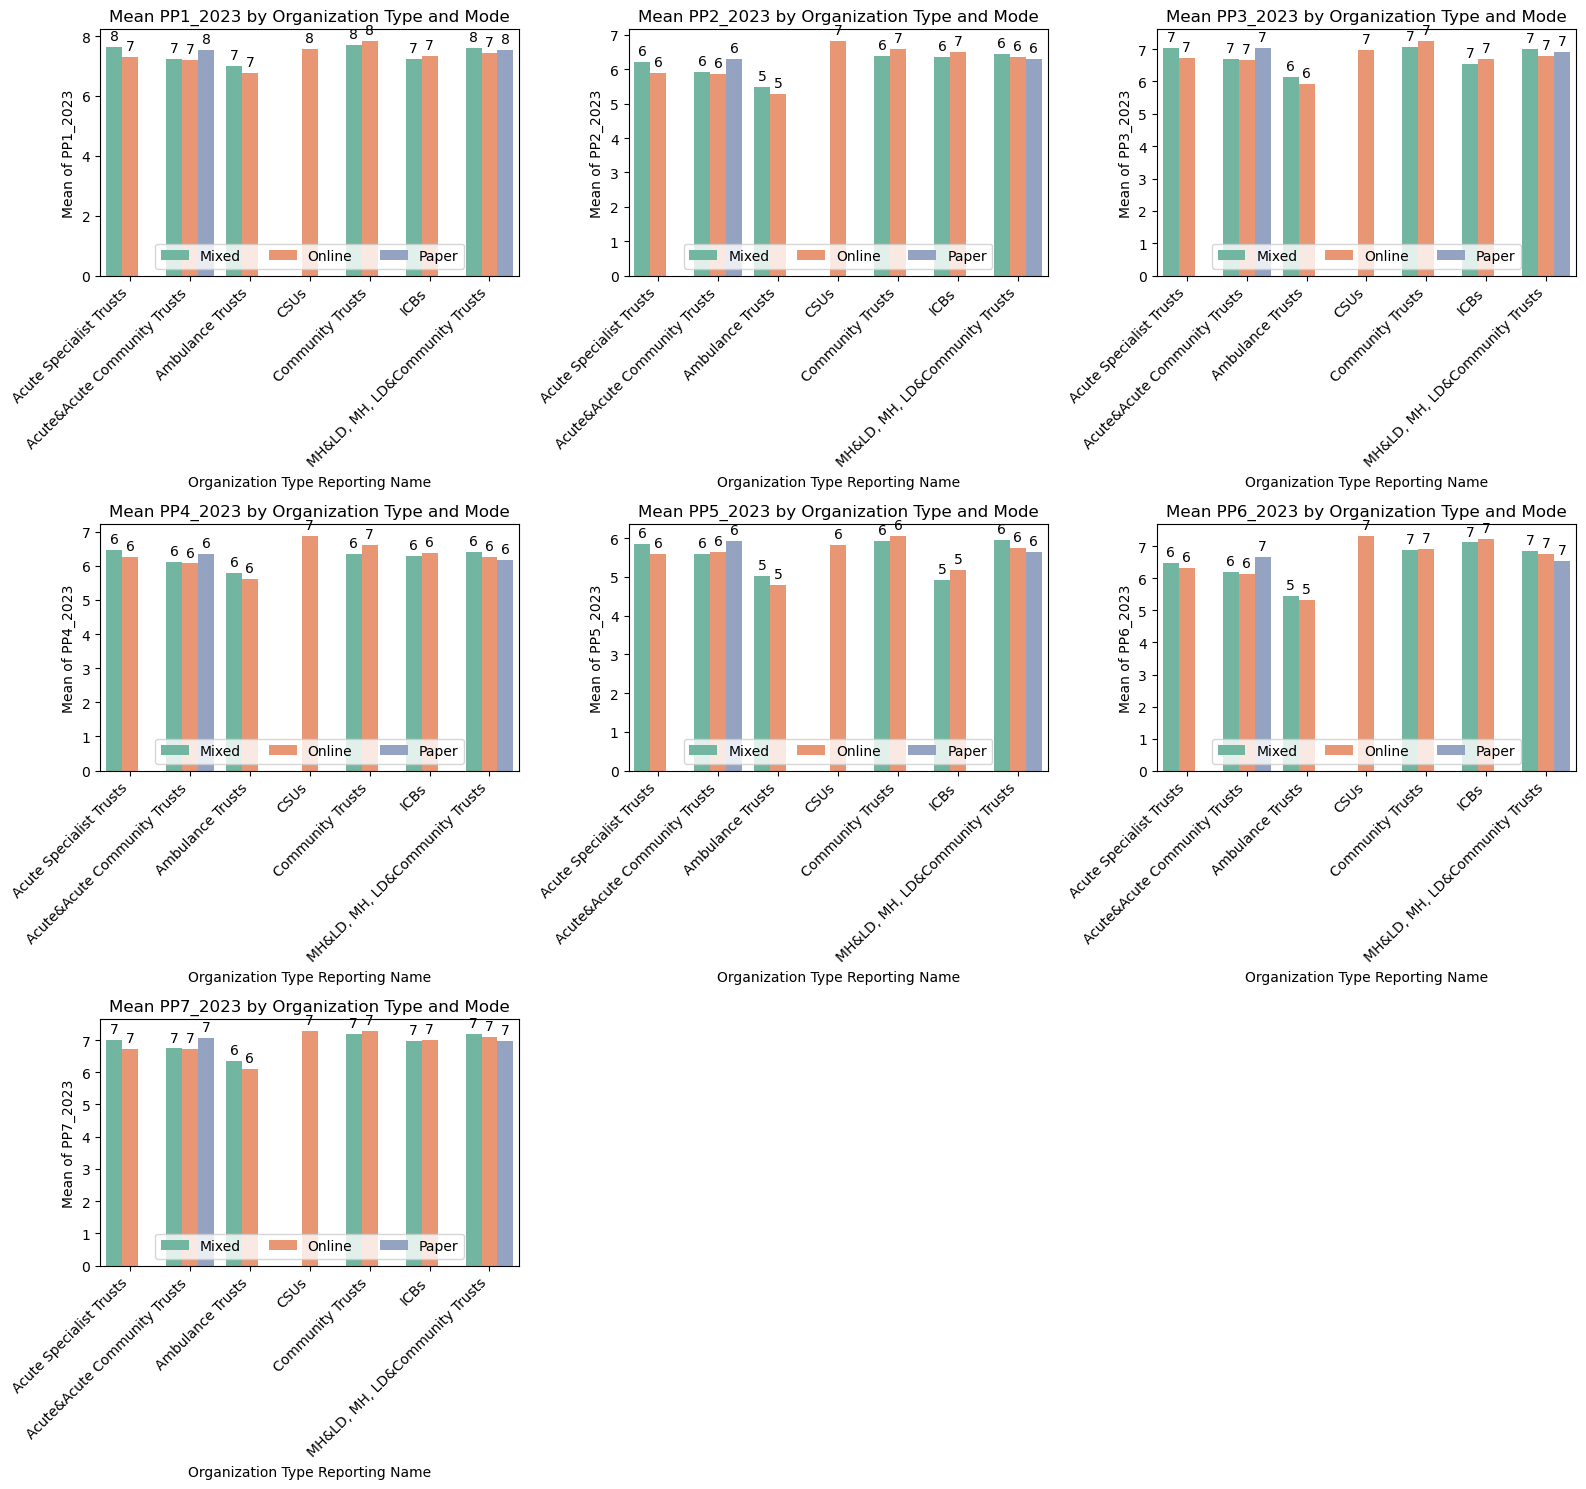

In [23]:
# List of PP columns to plot
pp_columns = ['PP1_2023', 'PP2_2023','PP3_2023',  'PP4_2023', 'PP5_2023', 'PP6_2023', 'PP7_2023']
#q12 = ['q12a_2023', 'q12b_2023', 'q12c_2023', 'q12d_2023','q12e_2023', 'q12f_2023','q12g_2023']
# Determine the number of rows and columns for the panel
n_cols = 3  # Number of columns in the panel
n_rows = (len(pp_columns) + n_cols - 1) // n_cols  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each PP column and create the corresponding subplot
for i, pp_column in enumerate(pp_columns):
    # Group the data by org_type_reporting_name and org_mode, then calculate the mean for the current PP column
    df_grouped = ALL_df_c.groupby(['org_type_reporting_name', 'org_mode'])[pp_column].mean().reset_index()
    
    # Create the bar plot on the corresponding axis
    sns.barplot(
        x='org_type_reporting_name', 
        y=pp_column, 
        hue='org_mode', 
        data=df_grouped, 
        palette='Set2',
        ax=axes[i]  # Plot on the ith subplot
    )
    
    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    # Add labels and title
    axes[i].set_xlabel('Organization Type Reporting Name')
    axes[i].set_ylabel(f'Mean of {pp_column}')
    axes[i].set_title(f'Mean {pp_column} by Organization Type and Mode')

    # Add the values on top of the bars
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.0f}',  # Format to 2 decimal places
                         (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center of the bar
                         ha='center', va='baseline', 
                         fontsize=10, color='black', xytext=(0, 5), 
                         textcoords='offset points')
     # Adjust the legend position for each subplot
    axes[i].legend(loc='lower center', ncol=3)
        
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


    
# Adjust the layout to make sure everything fits
plt.tight_layout()
plt.savefig("all_barplot.png") 
plt.show()

the bar charts shows the average score of the PPE over 3 years across the organisation benchmark base on the mode of the organisation. 

# Correlation Analysis

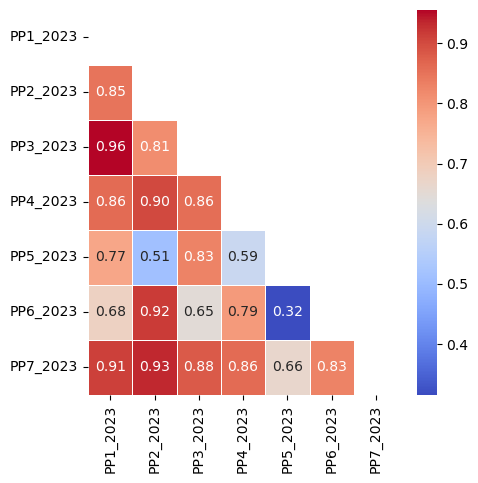

In [7]:
# Compute the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(5,5))
mask = np.triu(np.ones_like(combined_df.corr()))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5 , mask=mask)
#plt.title('Correlation Matrix of Dataset')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


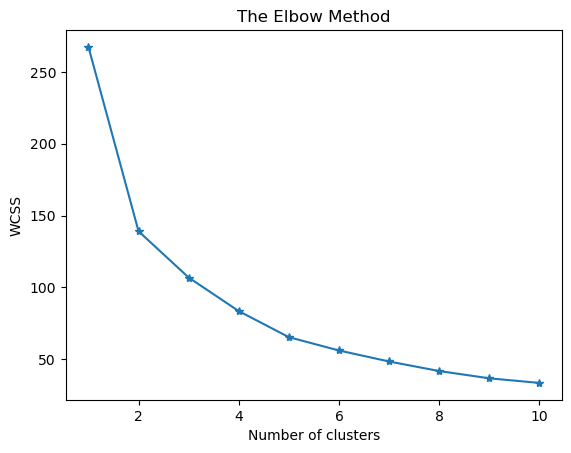

In [8]:
from sklearn.cluster import KMeans

data = combined_df.iloc[:, 0:7] # Select appropriate columns or rows as needed

# WCSS (Within-Cluster Sum of Squares)
wcss = []
n_samples = data.shape[0]  # Number of samples in the dataset

for i in range(1, min(11, n_samples + 1)):  # Ensure max clusters <= number of samples
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, len(wcss) + 1), wcss, marker="*")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


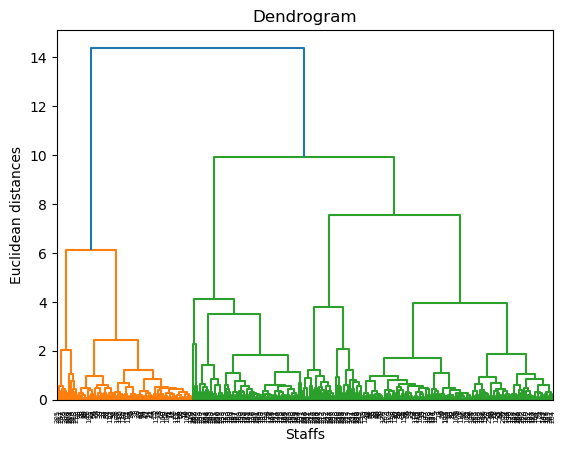

In [10]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Staffs')
plt.ylabel('Euclidean distances')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
print(y_hc)

[1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1
 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


The dendrogram depicted above, shows insight into the hierarchical structure of clusters and the sequential merging of data points during the clustering process. By segmenting the dendrogram along the longest vertical line and considering the distinctiveness of colors, we infer that the dataset can be grouped into two clusters, which is similar to the result from the screen plot using in determining the cluster for the Kmeans.
Moreso, due to the size of our data and for the consistency in results, the dendogram approach to clustering will be considered to the Kmeans for this research.

In [12]:
# Convert to DataFrame
Y_HC = pd.DataFrame(y_hc)
PPE_DATA = pd.concat([data, Y_HC], axis=1)

# Rename columns as needed
PPE_DATA.columns = ['PP1_2023', 'PP2_2023', 'PP3_2023', 'PP4_2023', 'PP5_2023', 'PP6_2023', 'PP7_2023', 'target']


print(PPE_DATA.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PP1_2023  268 non-null    float64
 1   PP2_2023  268 non-null    float64
 2   PP3_2023  268 non-null    float64
 3   PP4_2023  268 non-null    float64
 4   PP5_2023  268 non-null    float64
 5   PP6_2023  268 non-null    float64
 6   PP7_2023  268 non-null    float64
 7   target    268 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 16.9 KB
None


# Principal Component Analysis (PCA) for dimensional reduction

In [13]:
### naming the variable

X = PPE_DATA.iloc[:, :-1]
y = PPE_DATA.iloc[:, -1]
print(X)
print(y)

     PP1_2023  PP2_2023  PP3_2023  PP4_2023  PP5_2023  PP6_2023  PP7_2023
0    7.158871  5.861237  6.622585  6.063455  5.479979  5.892675  6.672107
1    7.328071  6.015901  6.799756  6.288742  5.650393  6.329103  6.732079
2    7.382589  5.974321  6.787813  6.083733  5.634663  6.271887  6.833052
3    7.100610  5.978381  6.494424  6.074975  5.581679  6.172738  6.658758
4    7.007766  5.640773  6.549778  5.891953  5.448066  5.842425  6.595168
..        ...       ...       ...       ...       ...       ...       ...
263  7.763271  6.413788  7.145478  6.389235  6.192794  6.644449  7.255178
264  7.593622  6.329513  6.999483  6.488434  5.641065  6.758276  7.065197
265  7.782106  6.492081  7.083390  6.290557  6.033979  6.940060  7.247735
266  7.544859  6.080844  6.786630  6.237480  5.417011  6.715967  7.266023
267  8.807651  7.913793  8.362839  8.024790  6.566667  8.092672  8.217810

[268 rows x 7 columns]
0      1
1      0
2      0
3      1
4      1
      ..
263    0
264    0
265    0
266    

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
X_transformed = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.78365084, 0.16692668, 0.022428  , 0.01175671, 0.00765022,
       0.00406267, 0.00352488])

In [16]:
for i, j in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {round(pca.explained_variance_ratio_[i]*100, 2)}%")

PC1: 78.37%
PC2: 16.69%
PC3: 2.24%
PC4: 1.18%
PC5: 0.77%
PC6: 0.41%
PC7: 0.35%


Text(0.5, 1.0, 'Principal Component vs Explained Variance')

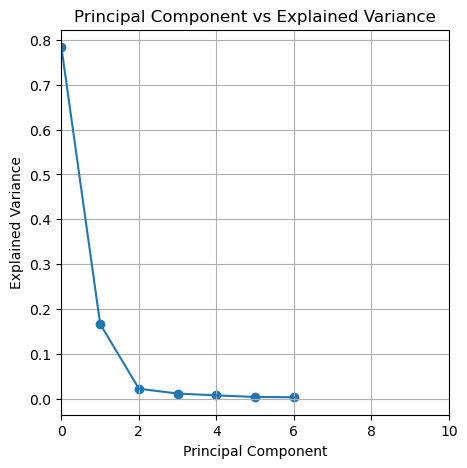

In [17]:
plt.figure(figsize=(5, 5))
plt.plot(range(0, 7),pca.explained_variance_ratio_)
plt.scatter(range(0, 7),pca.explained_variance_ratio_)
plt.grid()
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xlim(0, 10)
plt.title('Principal Component vs Explained Variance')

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[44  0]
 [ 0 10]]


1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


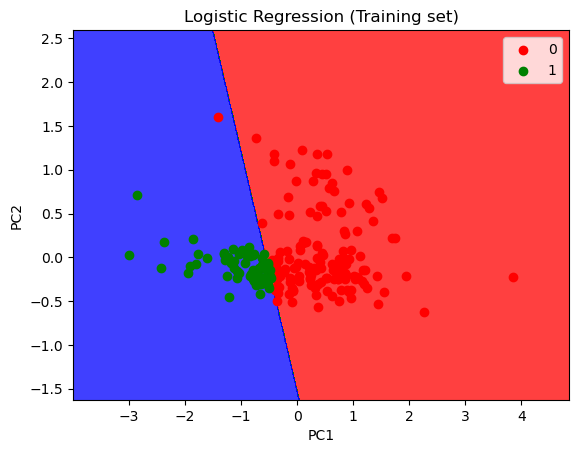

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


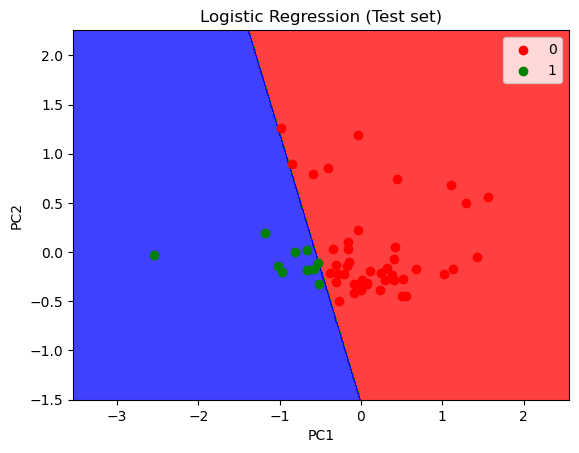

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Section 2: Understanding Staff experience based on their staff engagement and Morale. 


In [30]:
# Filter and print columns containing "theme morale"
columns_morale = [col for col in ALL_df_c.columns if 'theme_morale_202' in col.lower()]
print("\nColumns containing 'theme_morale':")
print(columns_morale)


Columns containing 'theme_morale':
['theme_morale_2023', 'theme_morale_2022', 'theme_morale_2021', 'theme_morale_2020']


In [32]:
# Filter and print columns containing "theme engagement"
columns_engagement = [col for col in ALL_df_c.columns if 'theme_engagement_202' in col.lower()]
print("\nColumns containing 'theme_morale':")
print(columns_engagement)


Columns containing 'theme_morale':
['theme_engagement_2023', 'theme_engagement_2022', 'theme_engagement_2021', 'theme_engagement_2020']


In [35]:
# Combine the columns into a single list
columns_to_select = columns_morale + columns_engagement

# Select only the columns you need
df_Morale_Engagement = ALL_df_c[columns_to_select]

# Print the selected DataFrame
print(df_Morale_Engagement.tail(5))

     theme_morale_2023  theme_morale_2022  theme_morale_2021  \
263           6.189991           5.818220           5.744646   
264           6.112768           5.850731           5.735999   
265           6.151166           5.893265                NaN   
266           5.639665           5.938561           5.672876   
267           7.730569           7.986332           6.750731   

     theme_morale_2020  theme_engagement_2023  theme_engagement_2022  \
263           5.987562               7.245933               6.968198   
264           6.296436               7.104405               6.932739   
265                NaN               7.246464               7.100089   
266           5.917190               6.732824               7.150195   
267           6.999628               8.472222               8.746914   

     theme_engagement_2021  theme_engagement_2020  
263               6.970768               7.237598  
264               6.885116               7.198481  
265                    NaN

In [36]:
### Checking for missing values
# Display basic information about the dataset
print(df_Morale_Engagement.info())


# Checking for missing values
print(df_Morale_Engagement.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   theme_morale_2023      268 non-null    float64
 1   theme_morale_2022      258 non-null    float64
 2   theme_morale_2021      242 non-null    float64
 3   theme_morale_2020      226 non-null    float64
 4   theme_engagement_2023  268 non-null    float64
 5   theme_engagement_2022  258 non-null    float64
 6   theme_engagement_2021  242 non-null    float64
 7   theme_engagement_2020  226 non-null    float64
dtypes: float64(8)
memory usage: 16.9 KB
None
theme_morale_2023         0
theme_morale_2022        10
theme_morale_2021        26
theme_morale_2020        42
theme_engagement_2023     0
theme_engagement_2022    10
theme_engagement_2021    26
theme_engagement_2020    42
dtype: int64


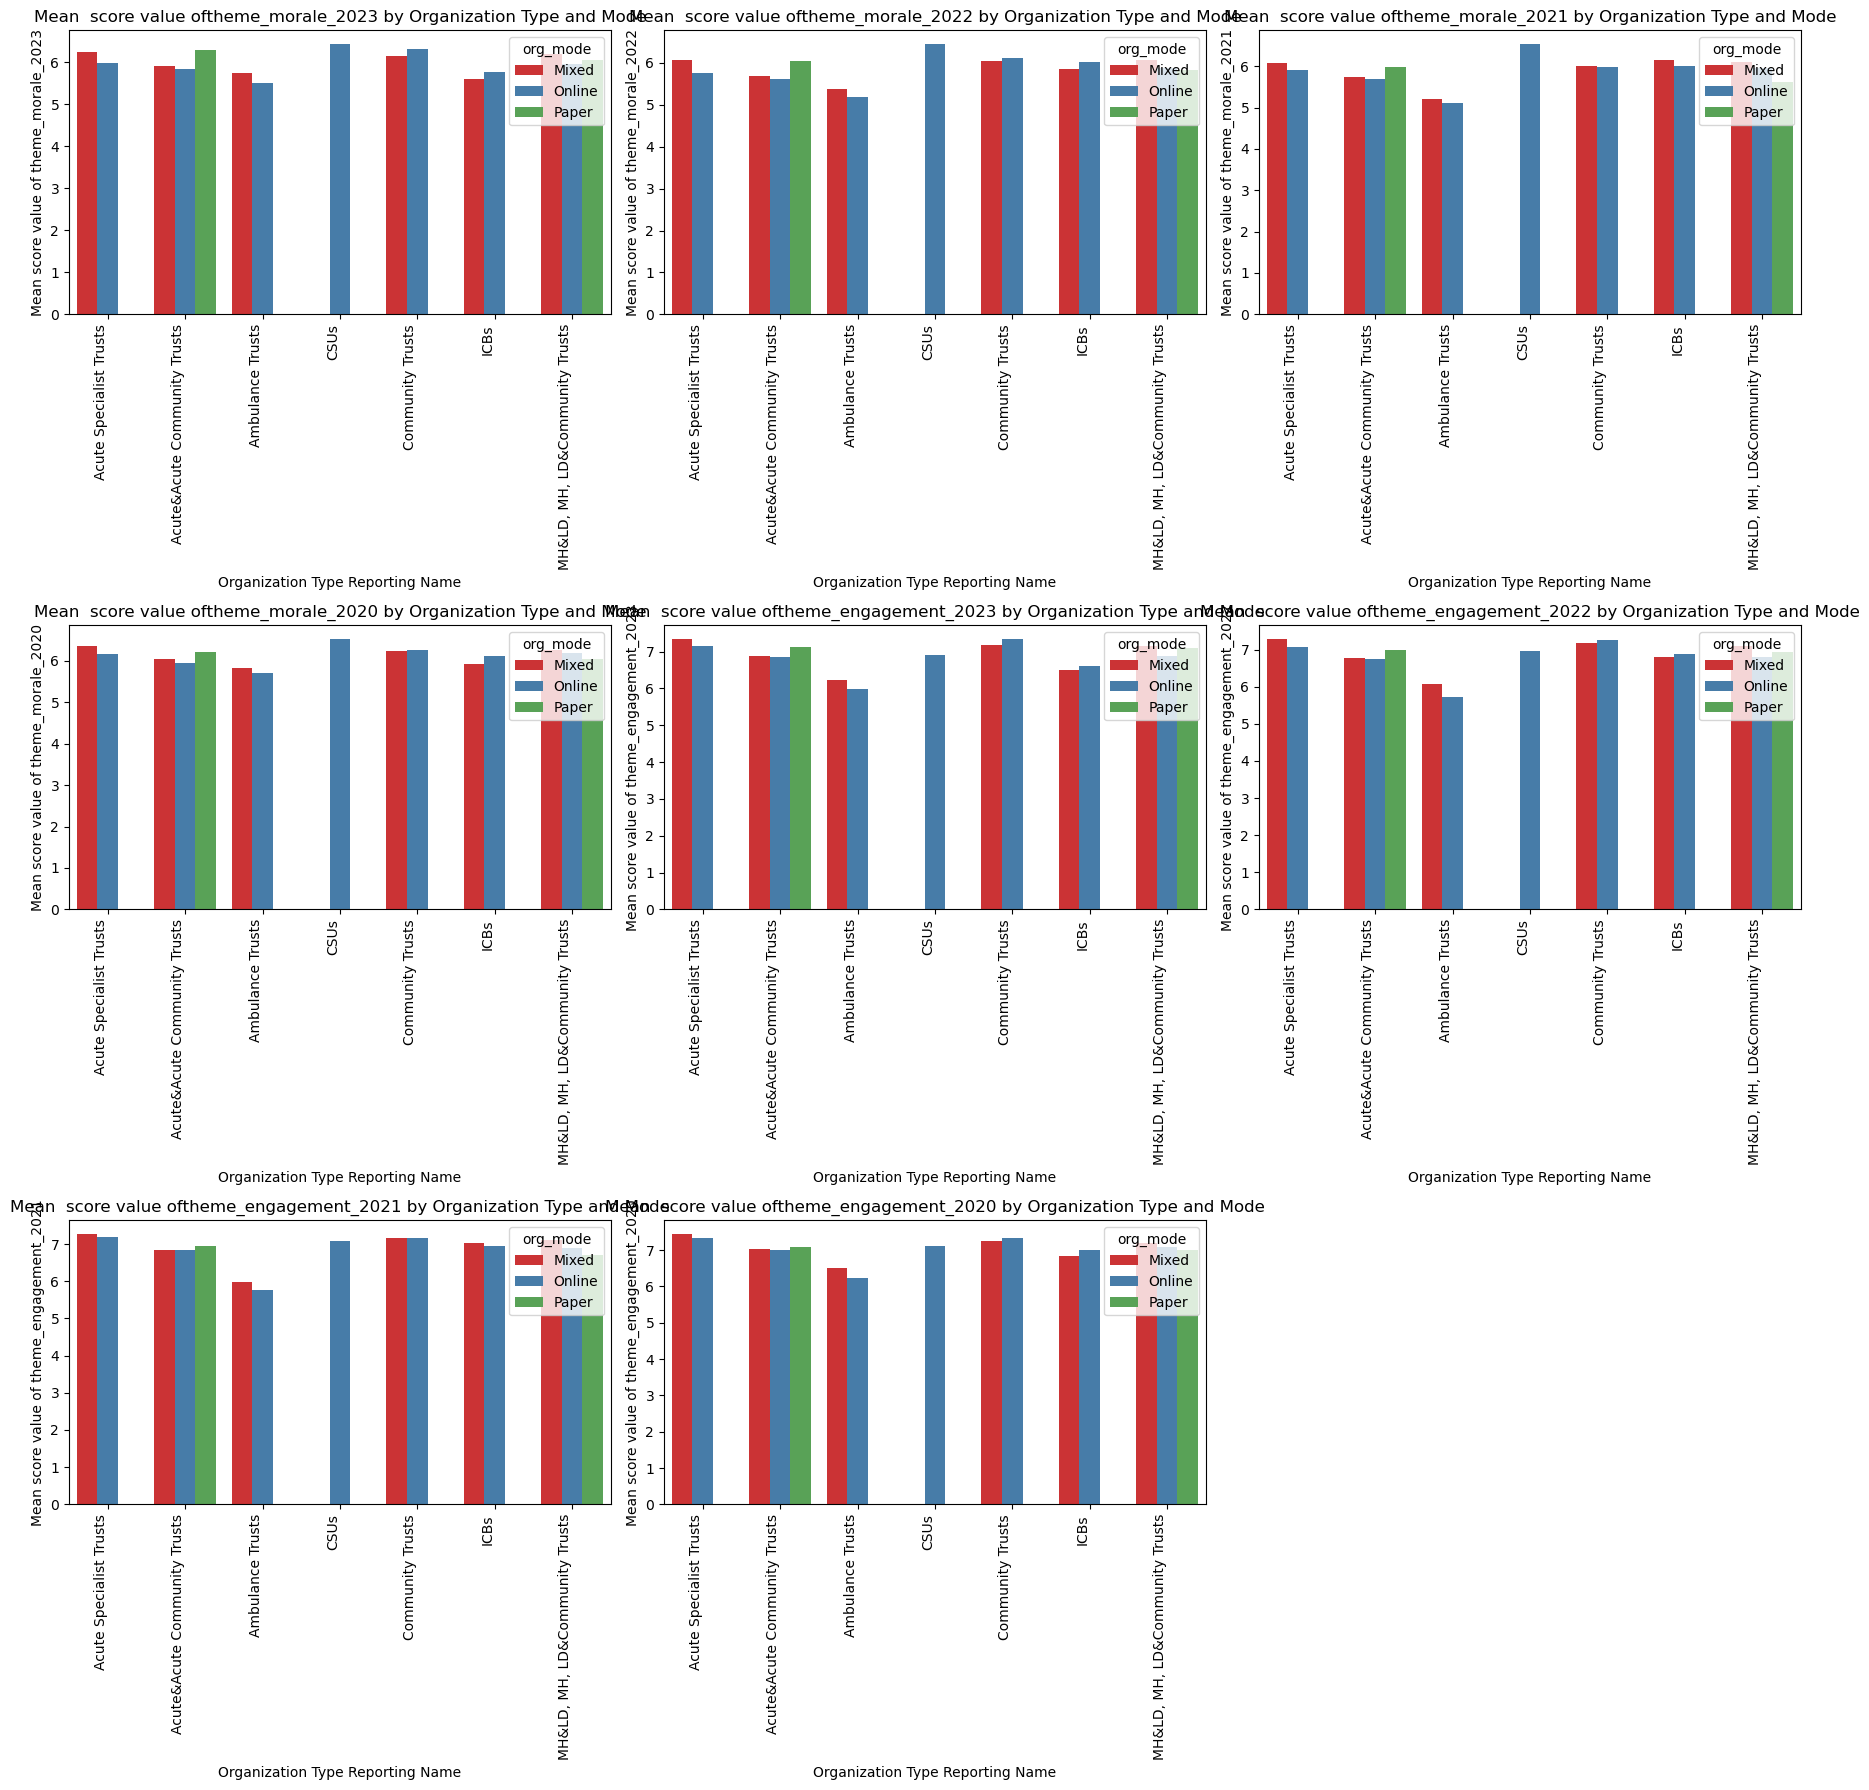

In [38]:
# Determine the number of rows and columns for the panel
n_cols = 3  # Number of columns in the panel
n_rows = (len(columns_to_select) + n_cols - 1) // n_cols  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each PP column and create the corresponding subplot
for i, column in enumerate(columns_to_select):
    # Group the data by org_type_reporting_name and org_mode, then calculate the mean for the current PP column
    df_grouped = ALL_df_c.groupby(['org_type_reporting_name', 'org_mode'])[column].mean().reset_index()
    
    # Create the bar plot on the corresponding axis
    sns.barplot(
        x='org_type_reporting_name', 
        y=column, 
        hue='org_mode', 
        data=df_grouped, 
        palette='Set1',
        ax=axes[i]  # Plot on the ith subplot
    )
    
    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')
    
    # Add labels and title
    axes[i].set_xlabel('Organization Type Reporting Name')
    axes[i].set_ylabel(f'Mean score value of {column}')
    axes[i].set_title(f'Mean  score value of{column} by Organization Type and Mode')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to make sure everything fits
plt.tight_layout()
plt.show()

In [ ]:
# Correlation Analysis

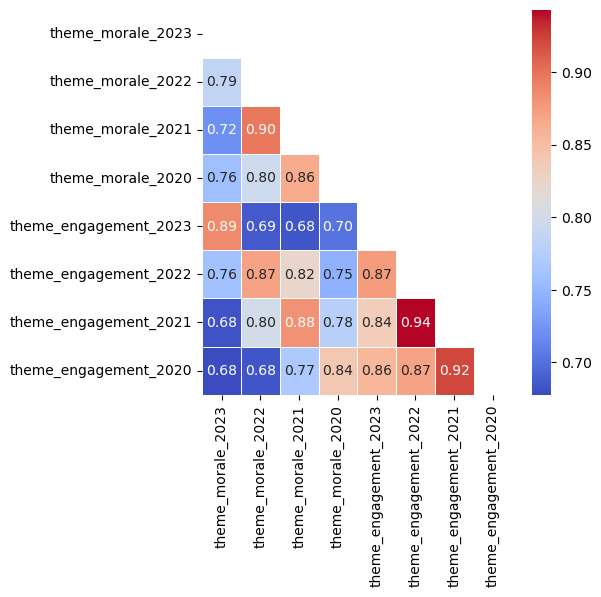

In [40]:
# Compute the correlation matrix
correlation_matrix = df_Morale_Engagement.corr()

# Plot the heatmap
plt.figure(figsize=(5,5))
mask = np.triu(np.ones_like(df_Morale_Engagement.corr()))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5 , mask=mask)
#plt.title('Correlation Matrix of Iris Dataset')
plt.show()

In [ ]:
# Kmeans

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


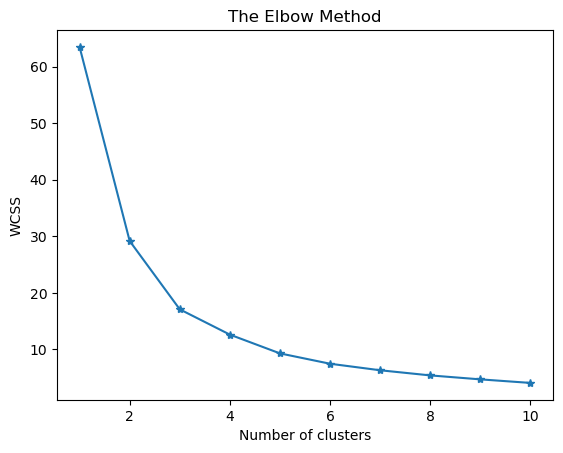

In [41]:
from sklearn.cluster import KMeans

data = df_Morale_Engagement.iloc[:, [0,4]] # Select appropriate columns or rows as needed

# WCSS (Within-Cluster Sum of Squares)
wcss = []
n_samples = data.shape[0]  # Number of samples in the dataset

for i in range(1, min(11, n_samples + 1)):  # Ensure max clusters <= number of samples
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, len(wcss) + 1), wcss, marker="*")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 1 2 1 1 0 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 2 2 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 2 0 1 2 0 1 1 1 1 1 1 1 1 2 1 1 2 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 2
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 0
 2 1 1 2 2 1 2 2 1 1 1 2 2 1 1 1 0 2 2 1 1 2 2 0 1 1 0 2 1 2 1 1 0 0 0 0 0
 0 0 1 1 0 0 0 1 0]


In [46]:
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of organisation')
plt.xlabel('theme_morale_2023')
plt.ylabel('theme_engagement_2023')
plt.legend()
plt.show()

InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True]), 0)

In [ ]:
# Dendogram

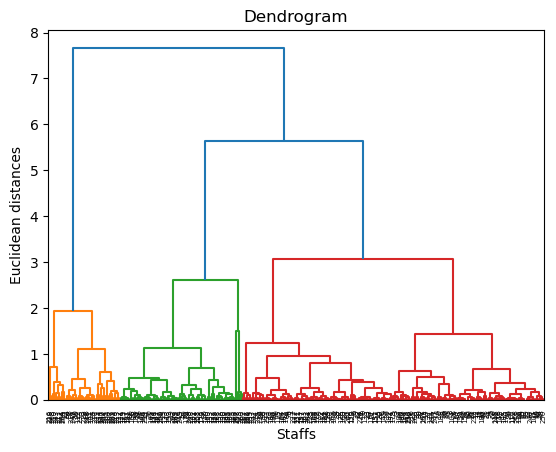

In [43]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Staffs')
plt.ylabel('Euclidean distances')
plt.show()

Section 3: Studing across the organiszational benchmark on how always the staff experience burnout and stress.          

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)
print(y_hc)

In [ ]:
def plot_hc(data, n_clusters, affinity='euclidean', linkage='ward'):
    # Perform hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
    y_hc = hc.fit_predict(data)
    
    # Add the cluster labels as a new column in the data
    data_with_clusters = pd.concat([data, pd.Series(y_hc, index=data.index, name='Cluster')], axis=1)
    
    return data_with_clusters

 
    
ppe_with_clusters = plot_hc(ppe_data, 2)
theme_M_E_with_clusters = plot_hc(Data_theme_M_E.iloc[:, [0, 4]], 3)
dataStress_with_clusters = plot_hc(Data_stress.iloc[:, [0, 3, 6, 9, 12, 15, 18]], 2)
Job_S_with_clusters = plot_hc(Data_job_S.iloc[:, [0, 4, 8, 12]], 2)

# To print the results, you can uncomment these lines:
print(ppe_with_clusters)
# print(theme_M_E_with_clusters)
# print(dataStress_with_clusters)
# print(Job_S_with_clusters)

In [24]:
#pip install nbconvert[webpdf]

In [ ]:
Section 4: Measuring the level of job satisfaction across and within the organisation benchmark group.